# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [11]:
import pandas as pd
from palmerpenguins import load_penguins
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
penguins = load_penguins()
penguins.dropna(inplace=True)


In [2]:
pengu_clean = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

In [ ]:
X = penguins.drop('species', axis = 1)
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 52, stratify=y)

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

# KNN 1

In [18]:
### k = 5
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

#interaction = PolynomialFeatures(degree= 3, include_bias=False)

knn_pipeline = Pipeline(
  [("preprocessing", ct),
 #  ("interaction", interaction),
  ("knn", KNeighborsClassifier(n_neighbors=5))]
)

knn_pipeline.fit(X_train, y_train)
y_train_pred = knn_pipeline.predict(X_train)
y_test_pred = knn_pipeline.predict(X_test)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Training accuracy: 0.9959839357429718
Test accuracy: 0.9880952380952381


In [19]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_test_pred = knn_pipeline.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[40  0  0]
 [ 1 14  0]
 [ 0  0 29]]


In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_test_pred)
print("Overall Accuracy:", accuracy)


Overall Accuracy: 0.9880952380952381


In [21]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the species classes for multi-class AUC
y_test_binarized = label_binarize(y_test, classes=["Adelie", "Chinstrap", "Gentoo"])
y_test_pred_binarized = label_binarize(y_test_pred, classes=["Adelie", "Chinstrap", "Gentoo"])

# Classification report for Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=["Adelie", "Chinstrap", "Gentoo"]))

# AUC score (one-vs-rest AUC)
auc = roc_auc_score(y_test_binarized, y_test_pred_binarized, average="macro", multi_class="ovr")
print("AUC Score:", auc)


Classification Report:
               precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.93      0.97        15
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.98        84
weighted avg       0.99      0.99      0.99        84

AUC Score: 0.98510101010101


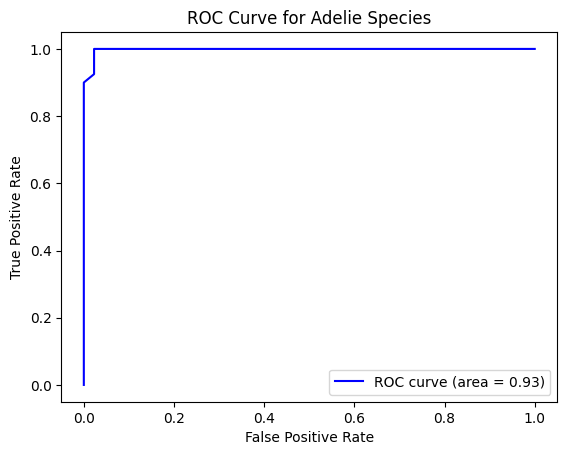

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Get probabilities for each class
y_test_prob = knn_pipeline.predict_proba(X_test)

# Plot ROC curve for a single species (e.g., "Adelie" with index 0)
fpr, tpr, _ = roc_curve(y_test_binarized[:, 0], y_test_prob[:, 0])

plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Adelie Species")
plt.legend(loc="lower right")
plt.show()


# KNN 2

In [22]:
### k = 50
ct = ColumnTransformer(
  [
    ("dummify", 
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize", 
    StandardScaler(), 
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform= "pandas")

#interaction = PolynomialFeatures(degree= 3, include_bias=False)

knn_pipeline = Pipeline(
  [("preprocessing", ct),
 #  ("interaction", interaction),
  ("knn", KNeighborsClassifier(n_neighbors=50))]
)

knn_pipeline.fit(X_train, y_train)
y_train_pred = knn_pipeline.predict(X_train)
y_test_pred = knn_pipeline.predict(X_test)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Training accuracy: 0.9718875502008032
Test accuracy: 0.9523809523809523


In [23]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_test_pred = knn_pipeline.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[40  0  0]
 [ 4 11  0]
 [ 0  0 29]]


In [24]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Overall Accuracy:", accuracy)


Overall Accuracy: 0.9523809523809523


In [25]:
# Binarize the species classes for multi-class AUC
y_test_binarized = label_binarize(y_test, classes=["Adelie", "Chinstrap", "Gentoo"])
y_test_pred_binarized = label_binarize(y_test_pred, classes=["Adelie", "Chinstrap", "Gentoo"])

# Classification report for Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=["Adelie", "Chinstrap", "Gentoo"]))

# AUC score (one-vs-rest AUC)
auc = roc_auc_score(y_test_binarized, y_test_pred_binarized, average="macro", multi_class="ovr")
print("AUC Score:", auc)

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.91      1.00      0.95        40
   Chinstrap       1.00      0.73      0.85        15
      Gentoo       1.00      1.00      1.00        29

    accuracy                           0.95        84
   macro avg       0.97      0.91      0.93        84
weighted avg       0.96      0.95      0.95        84

AUC Score: 0.9404040404040405


# Decision Tree 1 

In [29]:
dt_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("dt", DecisionTreeClassifier(max_depth=5))  # Adjust max_depth as needed
    ]
)

# Fit the pipeline
dt_pipeline.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = dt_pipeline.predict(X_train)
y_test_pred = dt_pipeline.predict(X_test)

# Calculate and print overall accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Print confusion matrix and classification report for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)


# Binarize the species classes for multi-class AUC
y_test_binarized = label_binarize(y_test, classes=["Adelie", "Chinstrap", "Gentoo"])
y_test_pred_binarized = label_binarize(y_test_pred, classes=["Adelie", "Chinstrap", "Gentoo"])

# Classification report for Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=["Adelie", "Chinstrap", "Gentoo"]))

# AUC score (one-vs-rest AUC)
auc = roc_auc_score(y_test_binarized, y_test_pred_binarized, average="macro", multi_class="ovr")
print("AUC Score:", auc)

Training Accuracy: 1.0
Test Accuracy: 0.9047619047619048
Confusion Matrix:
 [[35  5  0]
 [ 2 13  0]
 [ 1  0 28]]
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.92      0.88      0.90        40
   Chinstrap       0.72      0.87      0.79        15
      Gentoo       1.00      0.97      0.98        29

    accuracy                           0.90        84
   macro avg       0.88      0.90      0.89        84
weighted avg       0.91      0.90      0.91        84

AUC Score: 0.9277563869580362


# Decision Tree 2

In [30]:
dt_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("dt", DecisionTreeClassifier(max_depth=20, min_samples_split=2))  # Adjust max_depth as needed
    ]
)

# Fit the pipeline
dt_pipeline.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = dt_pipeline.predict(X_train)
y_test_pred = dt_pipeline.predict(X_test)

# Calculate and print overall accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Print confusion matrix and classification report for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Detailed classification report (precision, recall, f1-score for each class)
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=["Adelie", "Chinstrap", "Gentoo"]))

# AUC score (one-vs-rest AUC)
auc = roc_auc_score(y_test_binarized, y_test_pred_binarized, average="macro", multi_class="ovr")
print("AUC Score:", auc)

Training Accuracy: 1.0
Test Accuracy: 0.9642857142857143
Confusion Matrix:
 [[39  1  0]
 [ 1 14  0]
 [ 1  0 28]]
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.93      0.93      0.93        15
      Gentoo       1.00      0.97      0.98        29

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84

AUC Score: 0.9277563869580362
